# Plot Difference

In [15]:
from scipy.io import wavfile
import numpy as np
from pylab import plot, show, figure, imshow
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter, LogLocator

%matplotlib inline
plt.rcParams['figure.figsize'] = (8, 4) # set plot sizes to something larger than default
plt.style.use('ggplot') # use a nice plotting style

In [16]:
from pathlib import Path

FS = 48000  # sampling rate
PREDICTED_AUDIO = './audio/pred-gcn-gru-tfilm-41-20231201-132556-48k.wav'
TARGET_AUDIO = './audio/targ-gcn-gru-tfilm-41-20231201-132556-48k.wav'

In [17]:
output = wavfile.read(PREDICTED_AUDIO)[1]

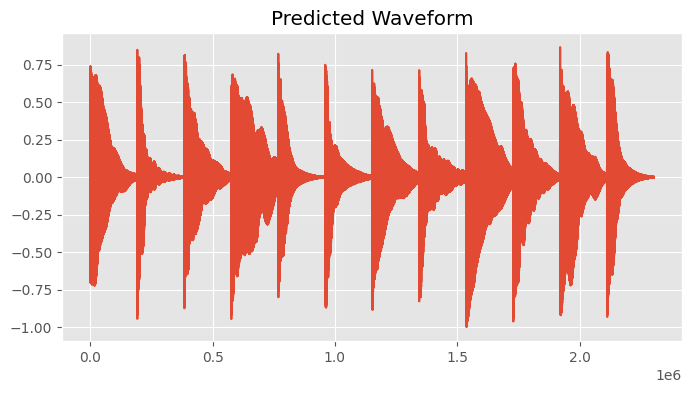

In [18]:
plot(output)
plt.title('Predicted Waveform')
show()

In [19]:
target = wavfile.read(TARGET_AUDIO)[1]

sample_rate = FS
N = 512
hop_size = 256
window = np.hanning(N)

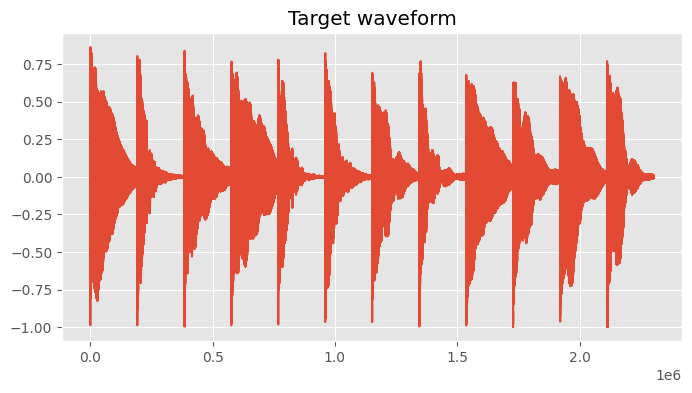

In [20]:
plot(target)

plt.title('Target waveform')
show()

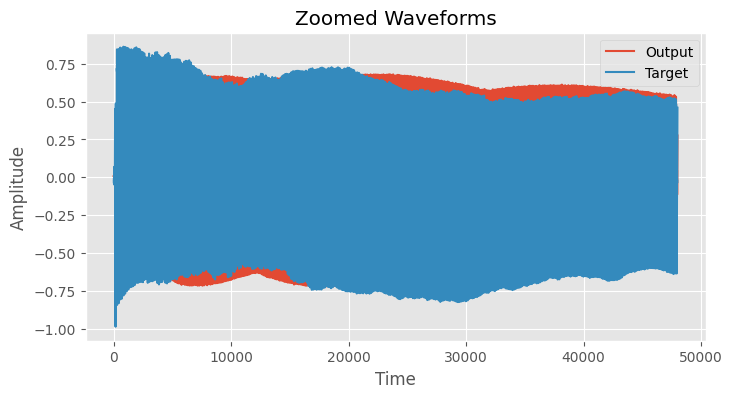

In [21]:
start = 1  # start of the zoom
end = 48000  # end of the zoom

# make sure your waveforms are numpy arrays
output_zoom = output[start:end]
target_zoom = target[start:end]

# create time vector
time = range(start, end)

plt.figure()
plt.plot(time, output_zoom, label='Output')
plt.plot(time, target_zoom, label='Target')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.title('Zoomed Waveforms')
plt.legend()
plt.grid(True)
plt.show()

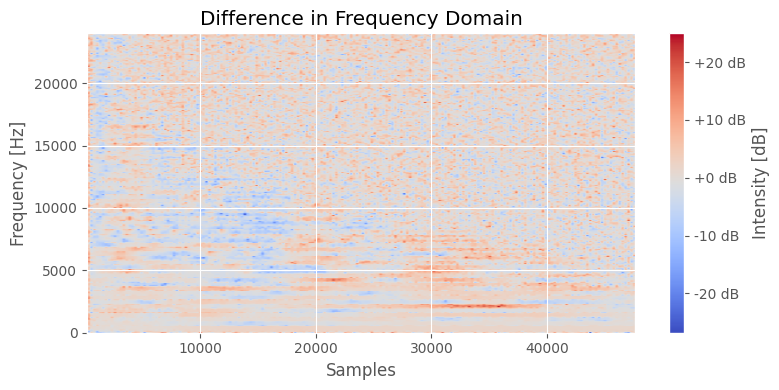

In [22]:
o = output_zoom
t = target_zoom

max_len = max(len(o), len(t))
o = np.pad(o, (0, max_len - len(o)))
t = np.pad(t, (0, max_len - len(t)))

# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _= plt.specgram(o, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(t, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
plt.close()

# Convert time values to sample values considering the 'start' index
t_o_samples = t_1 * sample_rate + start  # Here's the modification
t_t_samples = t_2 * sample_rate + start  # This should give you the absolute index in terms of the original signal

# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)  # Convert to dB and then subtract

# 3. Plot the difference
fig, ax = plt.subplots()
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o_samples[0], t_o_samples[-1], freqs_1[0], freqs_1[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Samples')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

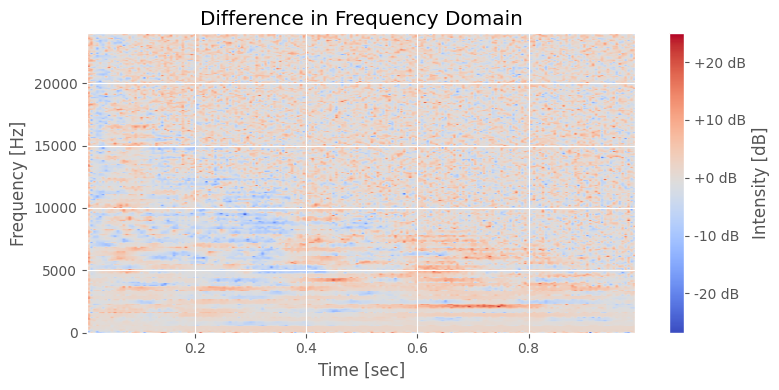

In [23]:
o = output_zoom
t = target_zoom

max_len = max(len(o), len(t))
o = np.pad(o, (0, max_len - len(o)))
t = np.pad(t, (0, max_len - len(t)))


# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _= plt.specgram(o, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(t, NFFT=N, Fs=sample_rate, window=window, noverlap=hop_size, scale='dB', mode='magnitude')
plt.close()
# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)  # Convert to dB and then subtract

# difference = Pxx_o - Pxx_t

# 3. Plot the difference
fig, ax = plt.subplots()
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_1[0], t_1[-1], freqs_1[0], freqs_1[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Time [sec]')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

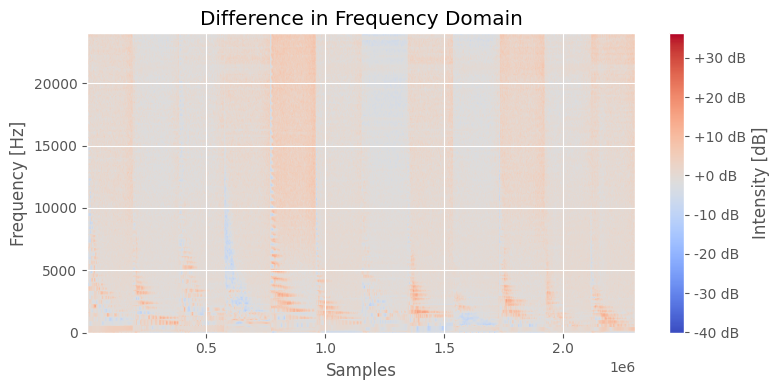

In [24]:
# Load both audio files
y1 = wavfile.read(PREDICTED_AUDIO)[1]

y2 = wavfile.read(TARGET_AUDIO)[1]

# Setting sample rate and STFT parameters
sample_rate = FS
n_fft_value = 512
hop_length_value = 256  # Adjust as needed for time resolution

# Ensure both audios have the same length
if len(y1) > len(y2):
    y1 = y1[:len(y2)]
else:
    y2 = y2[:len(y1)]

# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _ = plt.specgram(y1, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(y2, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
plt.close()

# Convert time values to sample values
t_o_samples = (t_1 * sample_rate).astype(int)
t_t_samples = (t_2 * sample_rate).astype(int)

# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)  # Convert to dB and then subtract

# 3. Plot the difference
fig, ax = plt.subplots()
img = ax.imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_o_samples[0], t_o_samples[-1], freqs_1[0], freqs_1[-1]])
ax.set_title("Difference in Frequency Domain")
ax.set_ylabel('Frequency [Hz]')
ax.set_xlabel('Samples')
ax.grid(True)

cbar = fig.colorbar(img, ax=ax, format="%+2.0f dB")
cbar.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()


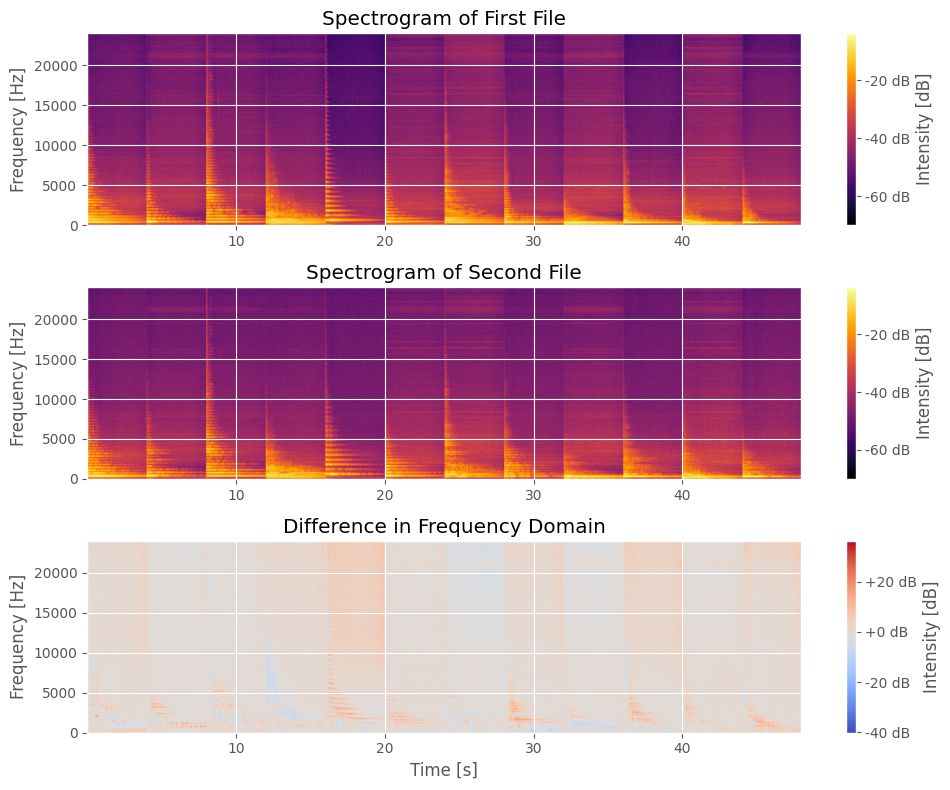

In [25]:
# Setting sample rate and STFT parameters
sample_rate = FS
n_fft_value = 512
hop_length_value = 256  # Adjust as needed for time resolution

# Ensure both audios have the same length
if len(y1) > len(y2):
    y1 = y1[:len(y2)]
else:
    y2 = y2[:len(y1)]

# 1. Compute the STFT for both signals
Pxx_1, freqs_1, t_1, _ = plt.specgram(y1, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
Pxx_2, freqs_2, t_2, _ = plt.specgram(y2, NFFT=n_fft_value, Fs=sample_rate, window=np.hanning(n_fft_value), noverlap=hop_length_value, scale='dB', mode='magnitude')
plt.close()

# 2. Subtract one spectrogram from the other
difference = 10 * np.log10(Pxx_2 + 1e-7) - 10 * np.log10(Pxx_1 + 1e-7)

# 3. Plot the spectrograms
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(10, 8))

# First audio file
img1 = axs[0].imshow(10 * np.log10(Pxx_1 + 1e-7), aspect='auto', origin='lower', cmap='inferno', extent=[t_1[0], t_1[-1], freqs_1[0], freqs_1[-1]])
axs[0].set_title("Spectrogram of First File")
axs[0].set_ylabel('Frequency [Hz]')
axs[0].grid(True)
cbar1 = fig.colorbar(img1, ax=axs[0], format="%+2.0f dB")
cbar1.set_label('Intensity [dB]')

# Second audio file
img2 = axs[1].imshow(10 * np.log10(Pxx_2 + 1e-7), aspect='auto', origin='lower', cmap='inferno', extent=[t_2[0], t_2[-1], freqs_2[0], freqs_2[-1]])
axs[1].set_title("Spectrogram of Second File")
axs[1].set_ylabel('Frequency [Hz]')
axs[1].grid(True)
cbar2 = fig.colorbar(img2, ax=axs[1], format="%+2.0f dB")
cbar2.set_label('Intensity [dB]')

# Difference
img3 = axs[2].imshow(difference, aspect='auto', origin='lower', cmap='coolwarm', extent=[t_1[0], t_1[-1], freqs_1[0], freqs_1[-1]])
axs[2].set_title("Difference in Frequency Domain")
axs[2].set_ylabel('Frequency [Hz]')
axs[2].set_xlabel('Time [s]')
axs[2].grid(True)
cbar3 = fig.colorbar(img3, ax=axs[2], format="%+2.0f dB")
cbar3.set_label('Intensity [dB]')

plt.tight_layout()
plt.show()

In [26]:
def nth_octave_smoothing(spectrum, n: int = 3):
    N = len(spectrum)
    freq_bins = np.linspace(0, int(sample_rate/2), N)
    y = np.zeros(shape=np.shape(spectrum), dtype = type(spectrum[0]))
    M_1 = len(spectrum) - 1

    for k in range(len(spectrum)):
        a = int(np.round(k * 2 ** (-1 /(2 * n))))
        b = int(np.round(k * 2 ** (1 /(2 * n))))

        if a == b:
            b += 1

        if b > M_1:
            b = M_1

        y[k] = (1 / ((b-1) - a + 1)) * np.sum(spectrum[a:b])
    return y, freq_bins

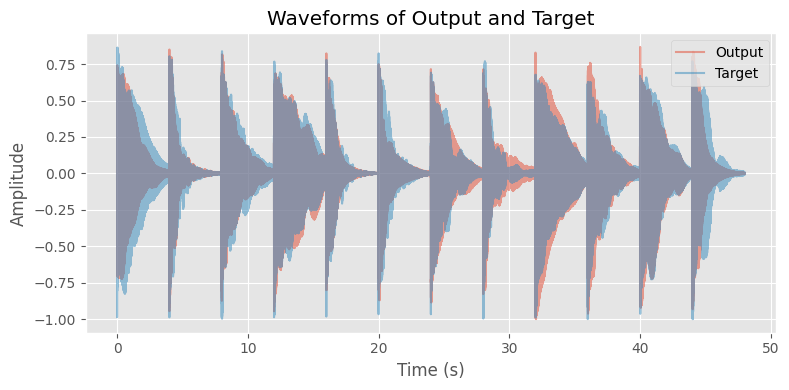

In [27]:
# Plot waveforms
plt.figure()

# Create time axis
time = [i/FS for i in range(len(y1))]

# Display the waveforms
plt.plot(time, y1, alpha=0.5, label='Output')
plt.plot(time, y2, alpha=0.5, label='Target')

# Zooming into a specific part (e.g., the first 0.1 seconds)
# start, end = 3.6, 4.0
# plt.xlim([start, end])
# plt.ylim([-0.5, 0.5])

# Adding legend and labels
plt.legend(loc='upper right')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Waveforms of Output and Target')
plt.grid(True)
plt.tight_layout()
plt.show()

Frequency of bin $i$:

\begin{equation}
    f(i) = \frac{i * SR} {2 * N (bins)} 
\end{equation}

In [28]:
def nth_octave_smoothing(spectrum, n: int = 3):
    N = len(spectrum)
    freq_bins = np.linspace(0, int(sample_rate/2), N)
    y = np.zeros(shape=np.shape(spectrum), dtype = type(spectrum[0]))
    M_1 = len(spectrum) - 1

    for k in range(len(spectrum)):
        a = int(np.round(k * 2 ** (-1 /(2 * n))))
        b = int(np.round(k * 2 ** (1 /(2 * n))))

        if a == b:
            b += 1

        if b > M_1:
            b = M_1

        y[k] = (1 / ((b-1) - a + 1)) * np.sum(spectrum[a:b])
    return y, freq_bins

In [29]:
sample_rate = FS
FRAME = int(2 ** 10)

[   INFO   ] TriangularBands: input spectrum size (1537) does not correspond to the "inputSize" parameter (1025). Recomputing the filter bank.
[   INFO   ] LogSpectrum: input spectrum size does not match '_frameSize' parameter. Reconfiguring the algorithm.
/var/folders/r3/6wg1rn_s4mnf6h5jb55z_rym0000gn/T/ipykernel_95271/121080060.py:37: UserWarning: Adding colorbar to a different Figure <Figure size 1000x800 with 7 Axes> than <Figure size 1000x800 with 3 Axes> which fig.colorbar is called on.
  cbar1 = fig.colorbar(img1, ax=axs[0], format="%+2.0f dB")
/var/folders/r3/6wg1rn_s4mnf6h5jb55z_rym0000gn/T/ipykernel_95271/121080060.py:44: UserWarning: Adding colorbar to a different Figure <Figure size 1000x800 with 8 Axes> than <Figure size 1000x800 with 3 Axes> which fig.colorbar is called on.
  cbar2 = fig.colorbar(img2, ax=axs[1], format="%+2.0f dB")
/var/folders/r3/6wg1rn_s4mnf6h5jb55z_rym0000gn/T/ipykernel_95271/121080060.py:53: UserWarning: Adding colorbar to a different Figure <Figure 

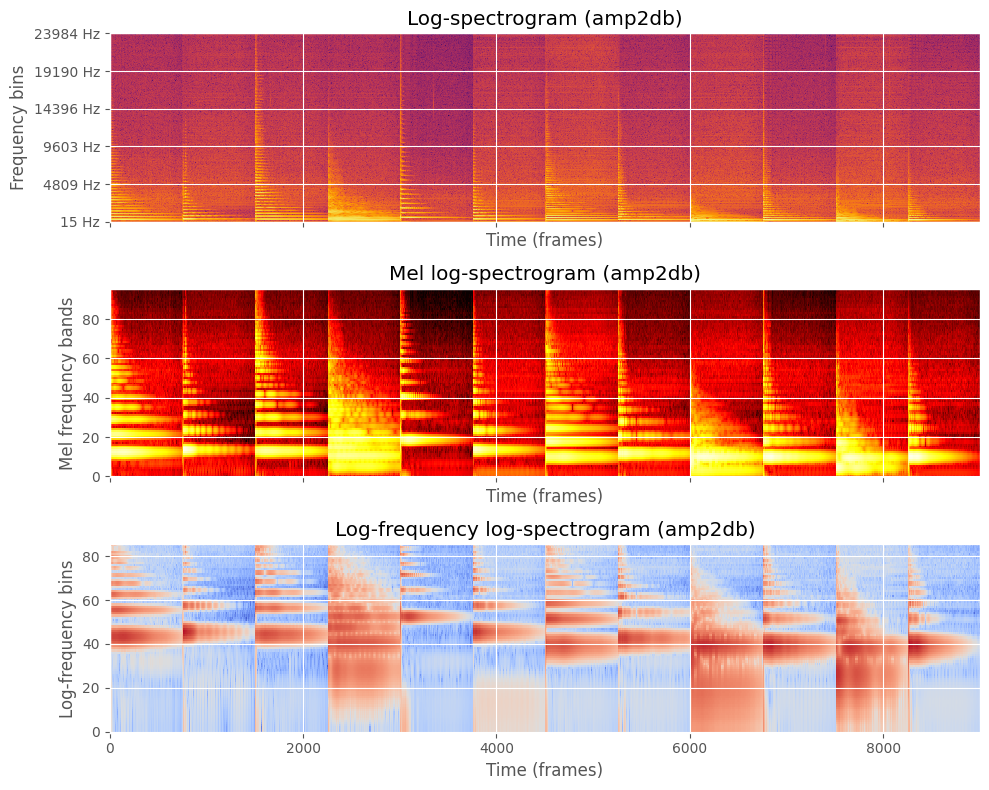

In [30]:
import essentia
import essentia.standard as estd

loader = estd.MonoLoader(filename=PREDICTED_AUDIO, sampleRate=sample_rate)
windowing = estd.Windowing(type='blackmanharris62', zeroPadding=2048)
spectrum = estd.Spectrum()
melbands = estd.MelBands(numberBands=96, lowFrequencyBound=0, highFrequencyBound=11000)
spectrum_logfreq = estd.LogSpectrum(binsPerSemitone=1)

amp2db = estd.UnaryOperator(type='lin2db', scale=2)
pool = essentia.Pool()

audio = loader()

for frame in estd.FrameGenerator(audio, frameSize=FRAME, hopSize=256):
    frame_spectrum = spectrum(windowing(frame))
    frame_mel = melbands(frame_spectrum)
    frame_spectrum_logfreq, _, _ = spectrum_logfreq(frame_spectrum)

    pool.add('spectrum_db', amp2db(frame_spectrum))
    pool.add('mel96_db', amp2db(frame_mel))
    pool.add('spectrum_logfreq_db', amp2db(frame_spectrum_logfreq))

num_bins = len(pool['spectrum_db'][0])

y_ticks = np.linspace(1, num_bins-1, 6)  # Creates 6 ticks
y_ticklabels = [f"{int(i * sample_rate / (2.0 * num_bins))} Hz" for i in y_ticks]

fig, ((ax1, ax2, ax3)) = plt.subplots(3, 1, sharex=True, sharey=False, figsize=(10, 8))

ax1.set_title("Log-spectrogram (amp2db)")
ax1.set_xlabel("Time (frames)")
ax1.set_ylabel("Frequency bins")
ax1.imshow(pool['spectrum_db'].T, aspect = 'auto', origin='lower', interpolation='none', cmap='inferno')
ax1.set_yticks(y_ticks)
ax1.set_yticklabels(y_ticklabels)
cbar1 = fig.colorbar(img1, ax=axs[0], format="%+2.0f dB")
cbar1.set_label('Intensity [dB]')

ax2.set_title("Mel log-spectrogram (amp2db)")
ax2.set_xlabel("Time (frames)")
ax2.set_ylabel("Mel frequency bands")
ax2.imshow(pool['mel96_db'].T, aspect = 'auto', origin='lower', interpolation='none', cmap='hot')
cbar2 = fig.colorbar(img2, ax=axs[1], format="%+2.0f dB")
cbar2.set_label('Intensity [dB]')

ax3.set_title("Log-frequency log-spectrogram (amp2db)")
ax3.set_xlabel("Time (frames)")
ax3.set_ylabel("Log-frequency bins")
ax3.imshow(pool['spectrum_logfreq_db'].T, aspect = 'auto', origin='lower', interpolation='none', cmap='coolwarm')
# ax3.set_yticks(y_ticks)
# ax3.set_yticklabels(y_ticklabels)
cbar3 = fig.colorbar(img3, ax=axs[2], format="%+2.0f dB")
cbar3.set_label('Intensity [dB]')

plt.tight_layout()